# Conhecendo a base de dados

* Link trello: https://trello.com/invite/b/CQVqKYER/ATTI17f8ced8f0ffdad7985661f1f42703dbE34BDE64/pandas-conhecendo-a-biblioteca

## Importando os dados


In [1]:
# IMPORT DO PANDAS
import pandas as pd
import numpy as np

In [2]:
# IMPORT DOS DADOS PARA UM DATAFRAME
df = pd.read_csv('alugueis.csv', delimiter=';')

## Características gerais da base de dados

In [3]:
# INFORMAÇÕES TÉCNICAS DA BASE DE DADOS
df.info() #valores nulos detectados nas colunas de Valor, Condominio, IPTU

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [4]:
# INFORMAÇÕES DE ESTATÍSTICA DESCRITIVA DOS DADOS
df.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


## Tratamento de valores nulos:

In [5]:
# VALORES NULOS:
df.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [6]:
# SUBSTITUINDO DADOS NULOS POR ZERO
df = df.fillna(0)
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [7]:
# REMOVENDO REGISTROS DE CONDOMINIOS OU VALORES COM DADOS = 0
indices_removiveis = df.query('Valor == 0 | Condominio == 0').index
df = df.drop(indices_removiveis, axis=0).reset_index(drop=True)


# Análise exploratória de dados

## Quantidade de bairros únicos na base de dados

In [8]:
qtd_bairros_unicos = df['Bairro'].value_counts().to_frame()

print('Quantidade de bairros únicos: ', qtd_bairros_unicos.shape[0])
qtd_bairros_unicos

Quantidade de bairros únicos:  150


,count
Bairro,
Barra da Tijuca,6010
Copacabana,2997
Centro,2931
Ipanema,2124
Recreio dos Bandeirantes,2007
...,...
Cavalcanti,1
Rio da Prata,1
Cidade Jardim,1


## Qual o valor médio de aluguel por tipo de imóvel?

In [9]:
# TIPOS DE IMÓVEIS E QUANTIDADES PRESENTES NA BASE DE DADOS
df['Tipo'].value_counts()

Tipo
Apartamento                    18780
Conjunto Comercial/Sala         6437
Casa de Condomínio               901
Loja/Salão                       819
Quitinete                        772
Flat                             433
Casa                             210
Loja Shopping/ Ct Comercial      210
Casa de Vila                      95
Galpão/Depósito/Armazém           68
Loft                              46
Casa Comercial                    31
Prédio Inteiro                    28
Box/Garagem                       20
Studio                             2
Pousada/Chalé                      1
Terreno Padrão                     1
Name: count, dtype: int64

<Axes: ylabel='Tipo'>

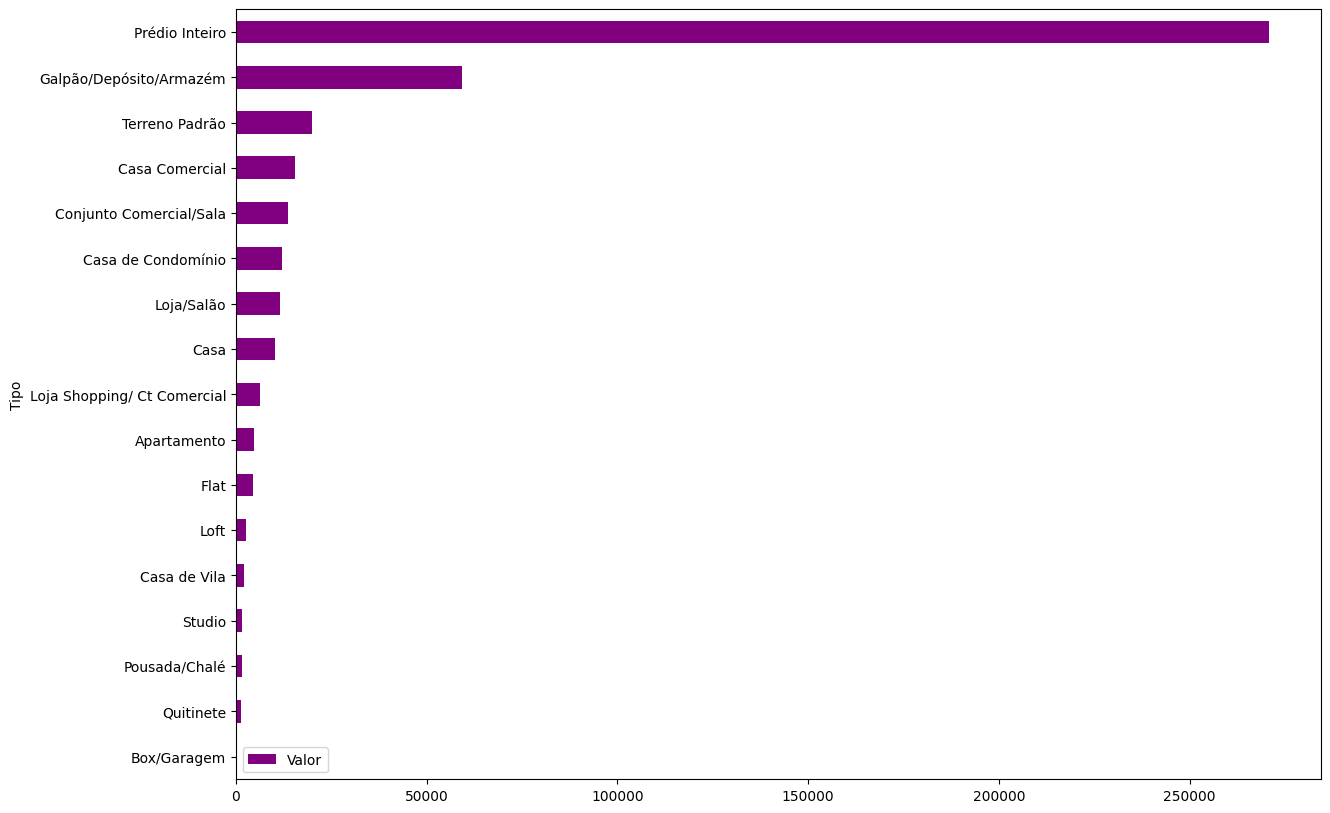

In [10]:
# DETECTANDO VALOR MÉDIO POR TIPO DE IMÓVEL
valor_tipo_imovel = df.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')
valor_tipo_imovel.plot(kind='barh', figsize=(14,10), color='purple')


## Removendo os imóveis comerciais

In [11]:
# IDENTIFICANDO OS IMÓVEIS DE CUNHO COMERCIAL:
df['Tipo'].unique()


array(['Quitinete', 'Conjunto Comercial/Sala', 'Apartamento', 'Flat',
       'Casa de Condomínio', 'Loja/Salão', 'Casa', 'Casa Comercial',
       'Casa de Vila', 'Loft', 'Loja Shopping/ Ct Comercial',
       'Galpão/Depósito/Armazém', 'Prédio Inteiro', 'Box/Garagem',
       'Pousada/Chalé', 'Studio', 'Terreno Padrão'], dtype=object)

In [12]:
# EXCLUINDO REGISTROS COM IMÓVEIS COMERCIAIS

"""
'Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial',
       'Terreno Padrão',
       'Loja Shopping/ Ct Comercial',
       'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'
"""
# Tipos de imóveis comerciais
comerciais = np.array(['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial',
       'Terreno Padrão',
       'Loja Shopping/ Ct Comercial',
       'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'])

# Filtrando imóveis não comerciais
df = df.query('@comerciais not in Tipo')
df['Tipo'].unique()

array(['Quitinete', 'Apartamento', 'Flat', 'Casa de Condomínio', 'Casa',
       'Casa de Vila', 'Loft', 'Box/Garagem'], dtype=object)

<Axes: ylabel='Tipo'>

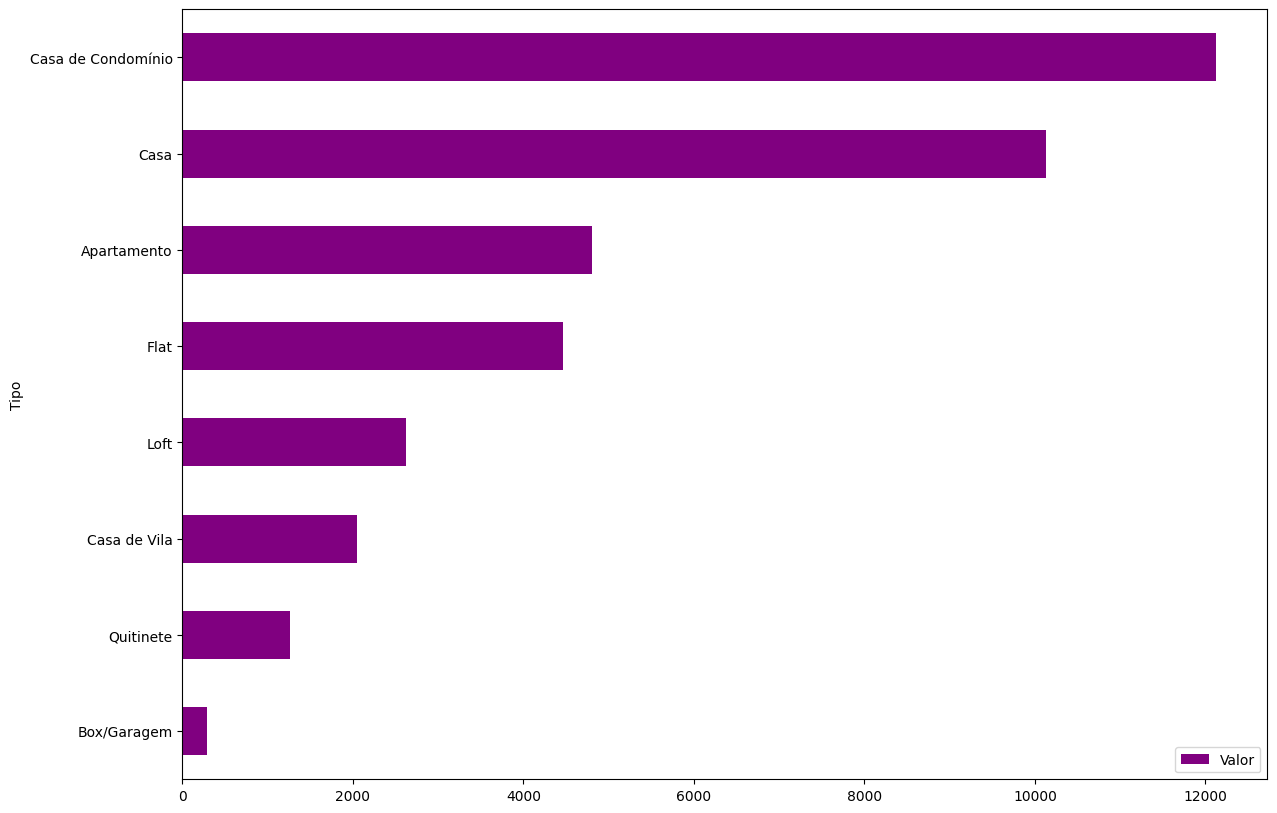

In [13]:
valor_tipo_imovel = df.groupby('Tipo')[['Valor']].mean().sort_values(by='Valor')
valor_tipo_imovel.plot(kind='barh', figsize=(14,10), color='purple')

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [14]:
# CALCULANDO O PERCENTUAL DE CADA TIPO DE IMÓVEL
qtd_tipo_imoveis = df['Tipo'].value_counts(normalize=True).reset_index(name='Quantidade Percentual (%)')
qtd_tipo_imoveis['Quantidade Percentual (%)'] *= 100
qtd_tipo_imoveis

,Tipo,Quantidade Percentual (%)
0,Apartamento,88.347368
1,Casa de Condomínio,4.238604
2,Quitinete,3.631745
3,Flat,2.036976
4,Casa,0.987910
5,Casa de Vila,0.446912
6,Loft,0.216399
7,Box/Garagem,0.094087


<Axes: xlabel='Tipo'>

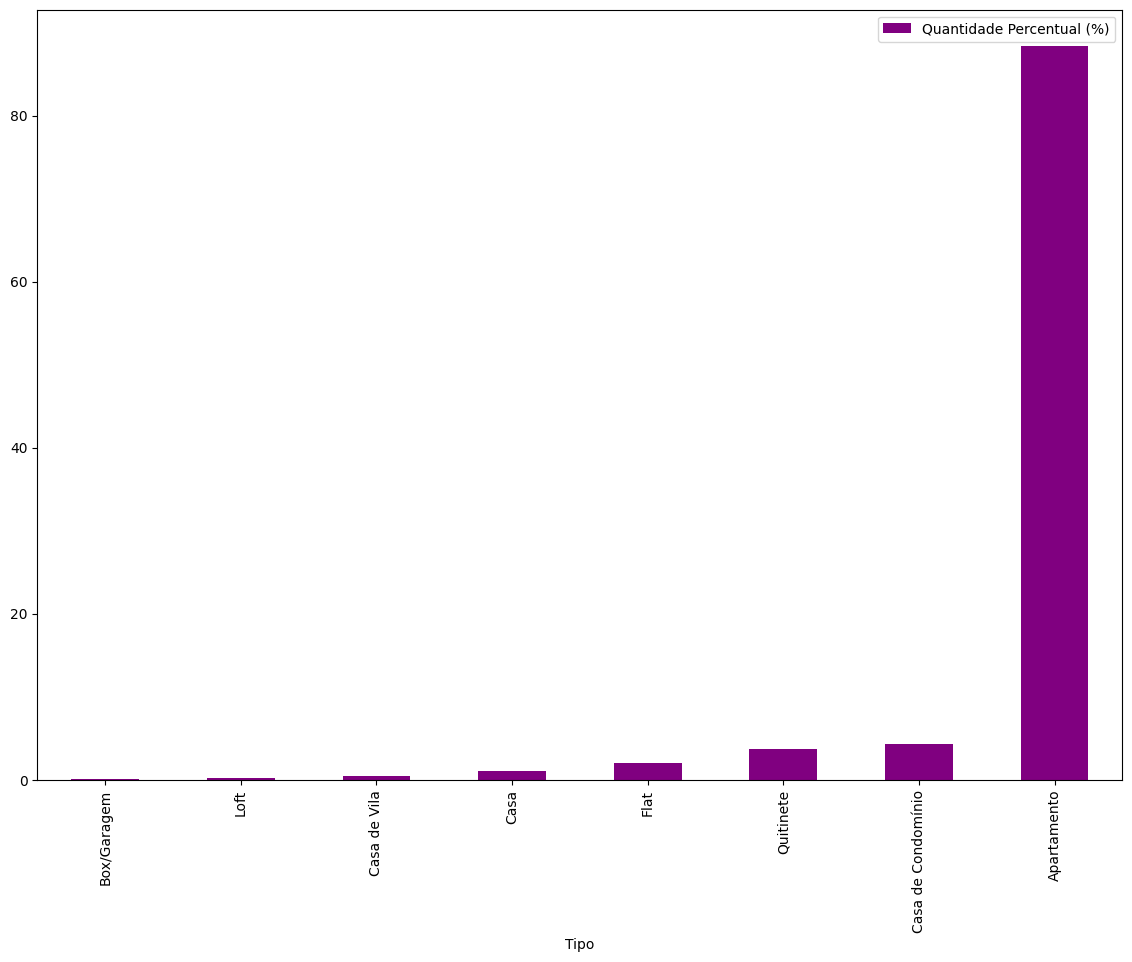

In [15]:
qtd_tipo_imoveis.sort_values(by='Quantidade Percentual (%)').plot(x='Tipo', y='Quantidade Percentual (%)', kind='bar', figsize=(14,10), color='purple')

### **Selecionando apenas os imóveis do tipo apartamento**

In [16]:
df_apartamentos = df.query('Tipo == "Apartamento"').reset_index(drop=True)
df_apartamentos.drop('Tipo', axis=1, inplace=True)

df_apartamentos

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Média de quartos por apartamento

In [17]:
media_quartos = df_apartamentos['Quartos'].mean()

print(f"Média de quartos por apartamento: {media_quartos:.0f}")

Média de quartos por apartamento: 2


## Média de valor de aluguel de apartamento mais elevada por bairro:

In [18]:
dados_bairro = df_apartamentos.groupby('Bairro')['Valor'].mean().to_frame(name='Média de Valor de Aluguel')
resultado = dados_bairro.loc[dados_bairro['Média de Valor de Aluguel'] == dados_bairro['Média de Valor de Aluguel'].max(), :]

resultado

,Média de Valor de Aluguel
Bairro,
Joá,15500.0


## Os 5 bairros com as médias de valores de aluguel de apartamento mais elevadas

In [19]:
dados_bairro = dados_bairro.sort_values('Média de Valor de Aluguel', ascending=False)
maiores_medias = dados_bairro.head(5)

maiores_medias

,Média de Valor de Aluguel
Bairro,
Joá,15500.000000
Arpoador,12923.916667
Cidade Jardim,12000.000000
Botafogo,9497.491569
Ipanema,9465.173210


<Axes: xlabel='Bairro'>

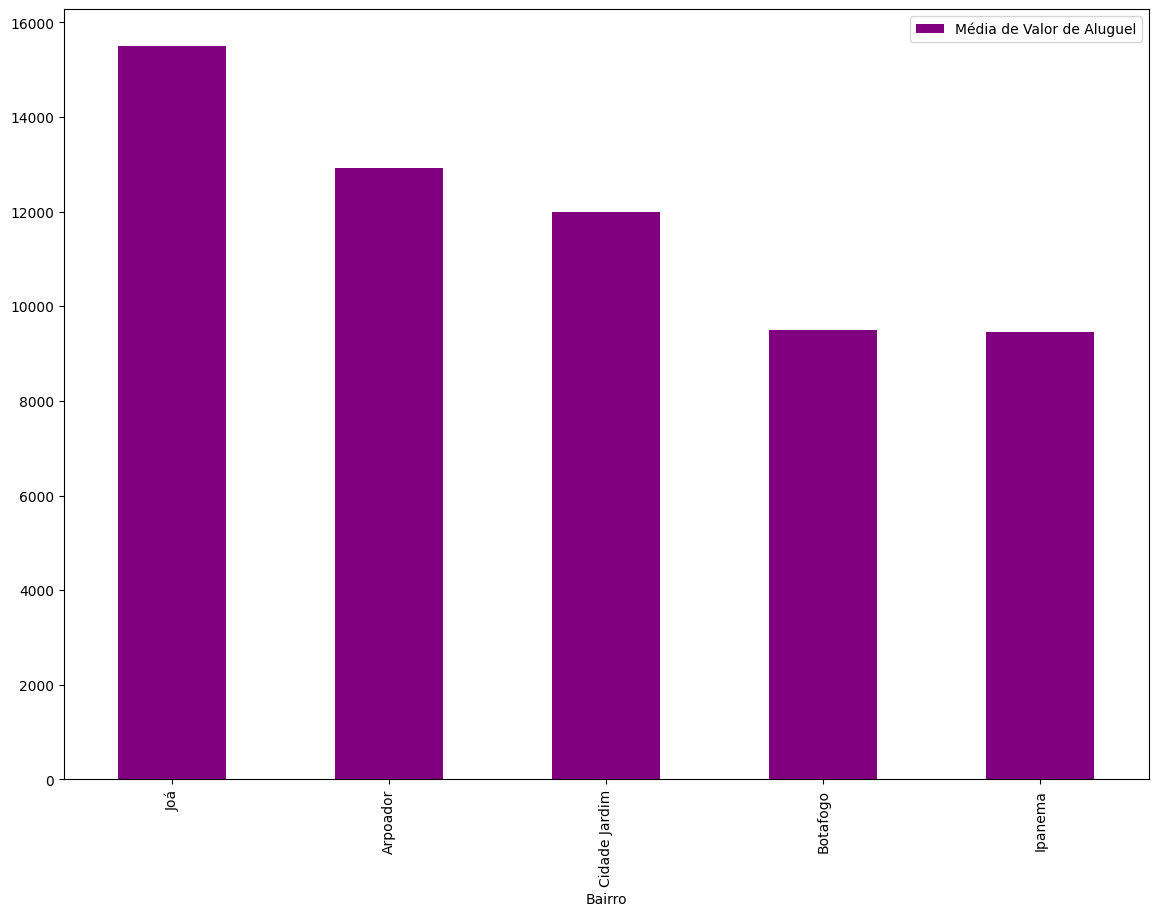

In [20]:
maiores_medias.plot(kind='bar', figsize=(14,10), color='purple')

## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [27]:
condicao1 = df_apartamentos['Quartos'] == 1
condicao2 = df_apartamentos['Valor'] < 1200

selecao = condicao1 & condicao2
resultado = df_apartamentos[selecao].reset_index(drop=True)

resultado

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [30]:
selecao = (df_apartamentos['Quartos'] >= 2) & (df_apartamentos['Valor'] < 3000) & (df_apartamentos['Area'] > 70)
resultado = df_apartamentos[selecao].reset_index(drop=True)

resultado

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


## Salvando os dados

In [37]:
# SALVANDO EM FORMATO CSV
df_apartamentos.to_csv('dados_apartamentos.csv', sep=';', index=False)

In [39]:
# TESTANDO VISUALIZAÇÃO
dados_salvos = pd.read_csv('dados_apartamentos.csv', delimiter=';')
dados_salvos

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Manipulando os dados

## Criando colunas numéricas

## Criando colunas categóricas